**Idea:**
    Our team was interested in seeing who was more prone to commute whether women or me using citibikes to go to their daily routines.For that purpouse we analyzed the commute hours of early morning (from 7-10) and evening (from 4 -7pm). Our level of significance is 0.05
    
**H0:** In 2015, there was an equal or smaller ratio of female Citi Bike users commuting in the evening vs. the morning 
compared to their male counterparts, significance level = 0.05.

**H0 Equation:** 

$$\frac{Women{\mathrm{evening}}{Women_\mathrm{morning} =< \frac{Men_\mathrm{evening}{Men_\mathrm{morning}}$$

**Ha:** In 2015, a larger ratio of female Citi Bike users commuting in the evening vs. the morning compared to their male 
counterparts. 

**Ha Equation:** 

$$\frac{Women_\mathrm{evening}{Women_\mathrm{morning}} > \frac{Men_\mathrm{evening} {Men_\mathrm{morning}}$$

In [1]:
from __future__ import print_function, division
from getCitiBikeCSV import getCitiBikeCSV
import os
import sys
import numpy as np
import pandas as pd
import pylab as pl
import zipfile
import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring ='201502'
data = getCitiBikeCSV(datestring)

('Downloading', '201502')
file in place, you can continue


In [3]:
df= pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [5]:
df = df.drop([u'tripduration', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year'],axis=1)

In [6]:
df.head()

,starttime,gender
0,2/1/2015 0:00,2
1,2/1/2015 0:00,1
2,2/1/2015 0:01,2
3,2/1/2015 0:01,2
4,2/1/2015 0:01,1


In [7]:
df['date'] = pd.to_datetime(df['starttime'])

In [8]:
df.head(2)

,starttime,gender,date
0,2/1/2015 0:00,2,2015-02-01
1,2/1/2015 0:00,1,2015-02-01


In [9]:
#http://stackoverflow.com/questions/24813673/split-datetime-column-into-a-date-and-time-python
df['Time'],df['Date'] = df['date'].apply(lambda x:x.time()),df['date'].apply(lambda x:x.date())

In [10]:
df.head()

,starttime,gender,date,Time,Date
0,2/1/2015 0:00,2,2015-02-01 00:00:00,00:00:00,2015-02-01
1,2/1/2015 0:00,1,2015-02-01 00:00:00,00:00:00,2015-02-01
2,2/1/2015 0:01,2,2015-02-01 00:01:00,00:01:00,2015-02-01
3,2/1/2015 0:01,2,2015-02-01 00:01:00,00:01:00,2015-02-01
4,2/1/2015 0:01,1,2015-02-01 00:01:00,00:01:00,2015-02-01


In [11]:
def morn_eve(data): 
    #generates 1 for Morning, 2 for Evening, 3 for not
    col_num = data.gender.count()
    bands = []
    morn_start = dt.time(hour = 7)
    morn_end = dt.time(hour = 10)
    eve_start = dt.time(hour = 16)
    eve_end = dt.time(hour = 19)
    for x in range(col_num):
        if data.Time[x] >= morn_start and data.Time[x] <= morn_end:
            bands.append(1)
        elif data.Time[x] >= eve_start and data.Time[x] <= eve_end:
            bands.append(2)
        else: 
            bands.append(float('NaN'))
    data['morn_eve']= bands
    return data

In [12]:
df2 = morn_eve(df)

In [13]:
df.dropna(axis = 0, inplace = True)
df.reset_index()
df2 = df[df['date'].dt.weekday < 5]
#removes all the neithers and weekends

In [14]:
df2.reset_index(inplace= True)
df2.head()

,index,starttime,gender,date,Time,Date,morn_eve
0,6558,2/2/2015 7:00,1,2015-02-02 07:00:00,07:00:00,2015-02-02,1.0
1,6559,2/2/2015 7:00,1,2015-02-02 07:00:00,07:00:00,2015-02-02,1.0
2,6560,2/2/2015 7:01,1,2015-02-02 07:01:00,07:01:00,2015-02-02,1.0
3,6561,2/2/2015 7:01,1,2015-02-02 07:01:00,07:01:00,2015-02-02,1.0
4,6562,2/2/2015 7:03,1,2015-02-02 07:03:00,07:03:00,2015-02-02,1.0


In [15]:
label_names = ['Mon Morn', 'Mon Eve', 'Tues Morn', 'Tues Eve', 'Wed Morn', 'Wed Eve', 'Thurs Morn', 'Thurs Eve', 'Fri Morn', 'Fri Eve']

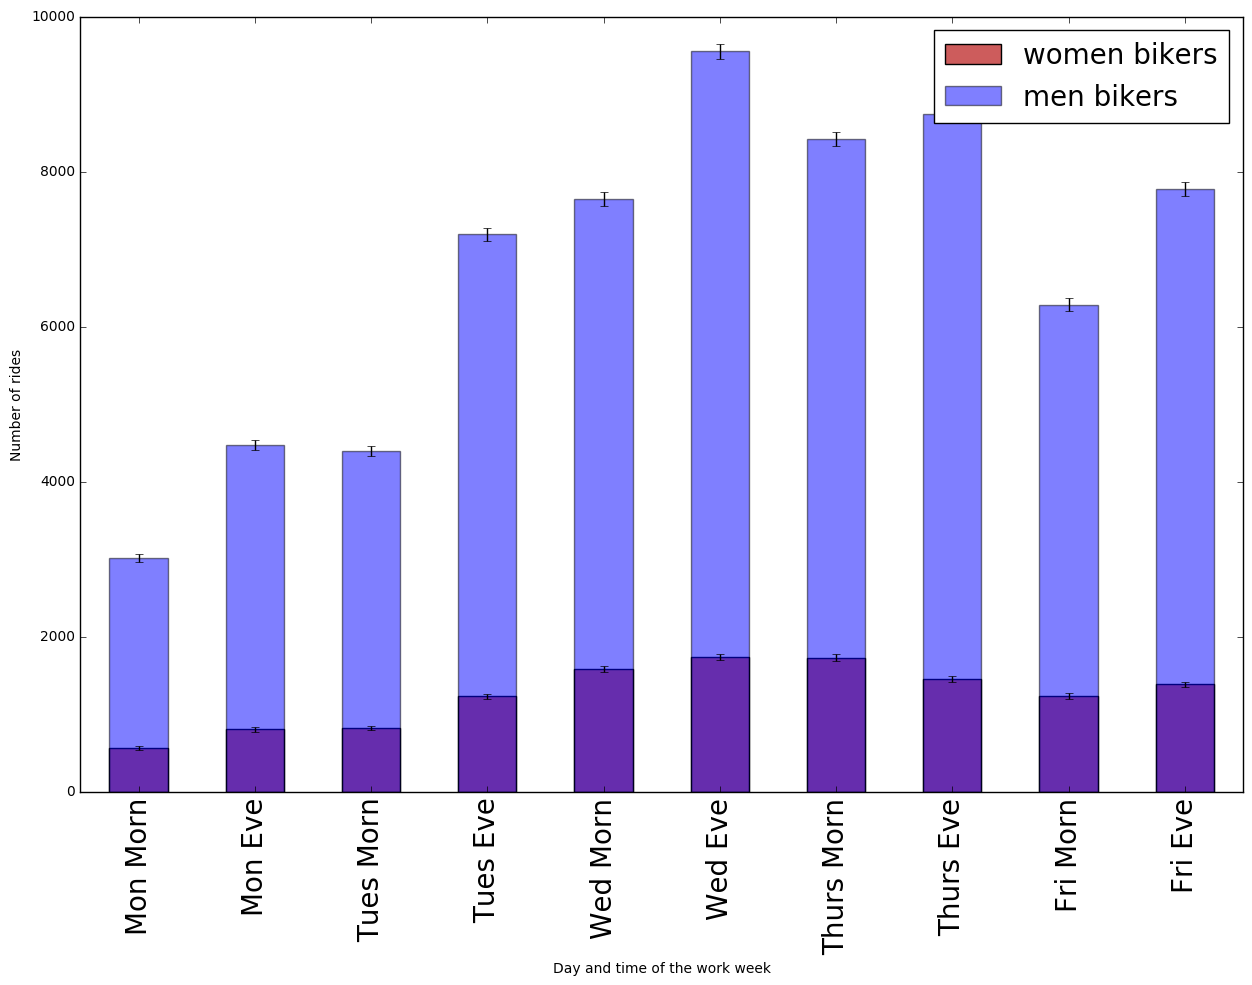

In [16]:
fig=pl.figure(figsize(15,10))

counts_w = df2['date'][df2['gender'] == 2].groupby([df2['date'].dt.weekday, df2['morn_eve']]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df2['date'][df2['gender'] == 1].groupby([df2['date'].dt.weekday, df2['morn_eve']]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(label_names, fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day and time of the work week")
pl.legend(['women bikers','men bikers'],fontsize=20)

### Figure 1:  Distribution of users by gender and commute hours in February 2015

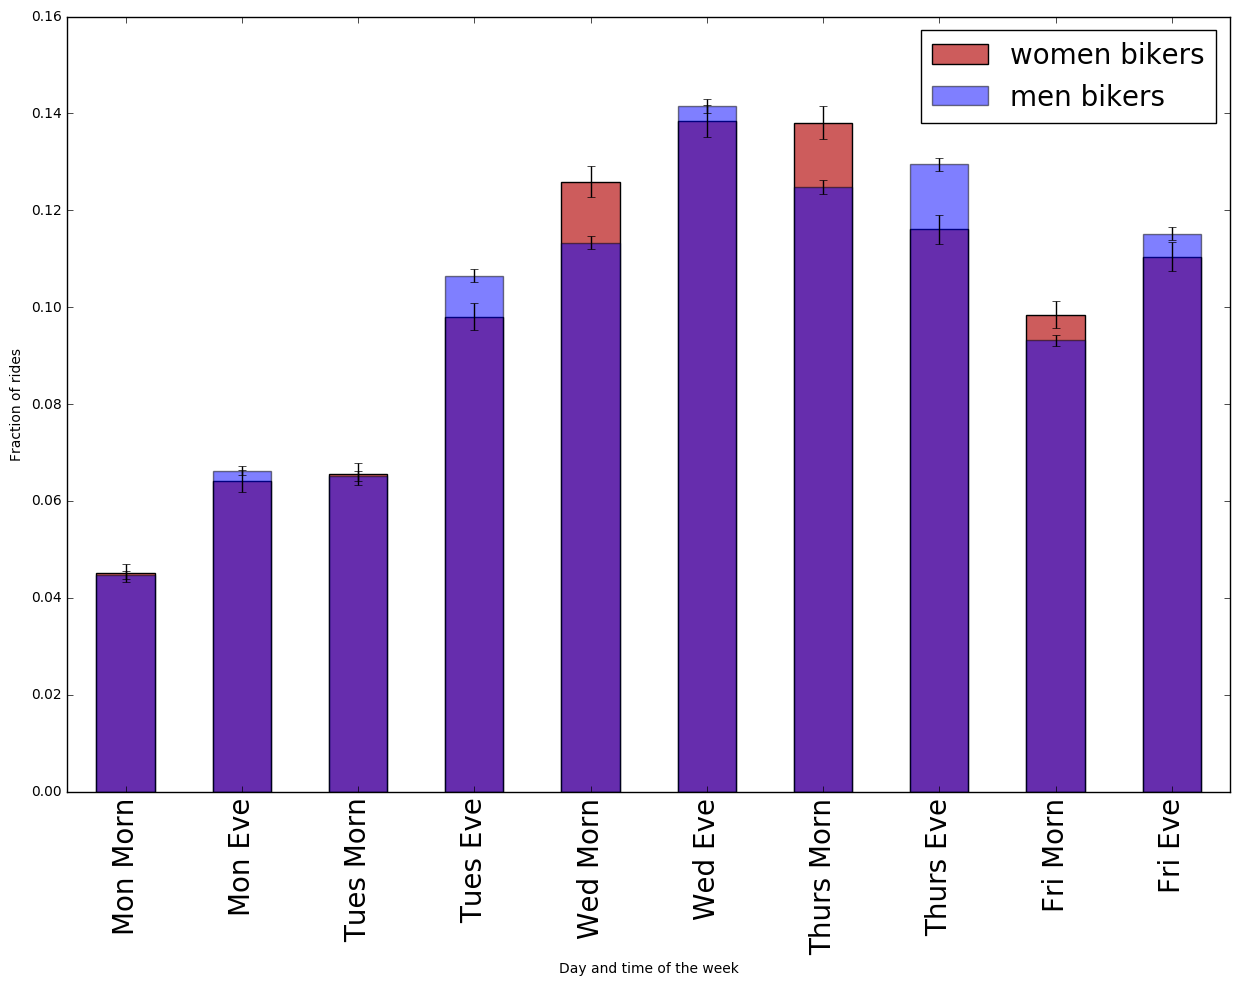

In [17]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m)/norm_m,(error_m)/norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(label_names, fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day and time of the week")

pl.legend(['women bikers','men bikers'],fontsize=20)


### Figure 2: Normalized Distribution of users by gender and commute hours in February 2015

Men: morning:0.792, evening:0.208, morning error:0.003, evening error:0.003
Women: morning:0.473, evening:0.527, morning error:0.006, evening error:0.006


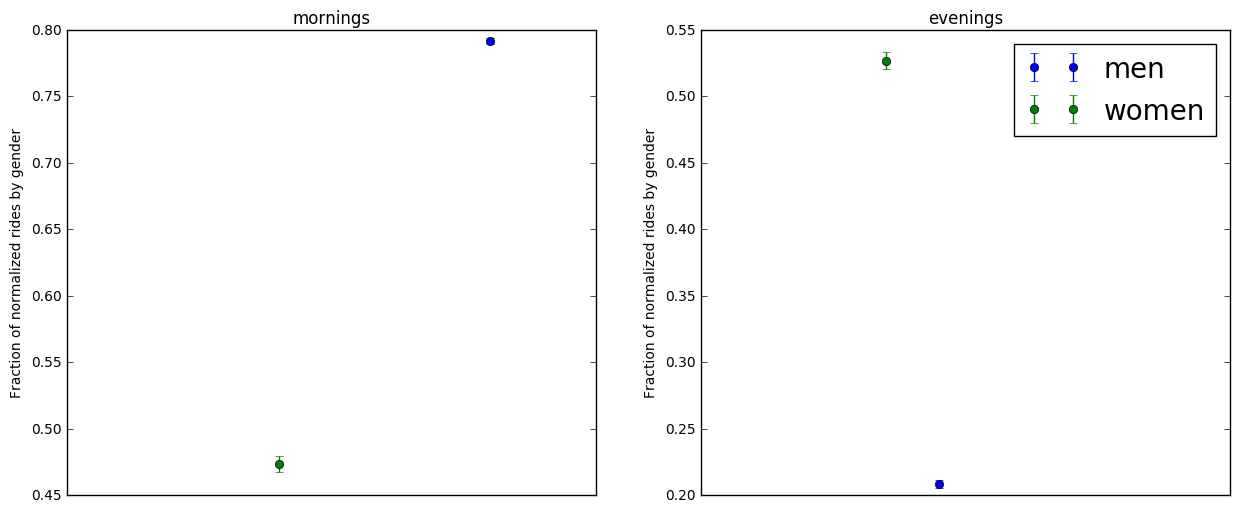

In [18]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
morn_w = sum(counts_w[::2]) * 1.0 / norm_w
eve_w = sum(counts_w[1::2]) * 1.0 / norm_w
emorn_w = np.sqrt(sum(error_w[::2]**2)) / norm_w
eeve_w = np.sqrt(sum(error_w[1::2]**2)) / norm_w

morn_m = sum(counts_m[:-2]) * 1.0 / norm_m
eve_m = sum(counts_m[-2:]) * 1.0 / norm_m
emorn_m = np.sqrt(sum(error_m[::2]**2)) / norm_m
eeve_m = np.sqrt(sum(error_m[1::2]**2)) / norm_m

print("Men: morning:{0:.3f}, evening:{1:.3f}, morning error:{2:.3f}, evening error:{3:.3f}"\
      .format(morn_m, eve_m, emorn_m, eeve_m))
print("Women: morning:{0:.3f}, evening:{1:.3f}, morning error:{2:.3f}, evening error:{3:.3f}"\
      .format(morn_w, eve_w, emorn_w, eeve_w))

ax1.errorbar([0.4], [morn_m], yerr=[emorn_m], fmt='o', label='men')
ax1.errorbar([0.2], [morn_w], yerr=[emorn_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [eve_m], yerr=[eeve_m], fmt='o', label='men')
ax2.errorbar([0.2], [eve_w], yerr=[eeve_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("mornings")
ax2.set_title("evenings")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

### Figure 3: The figure shows the ratio of normalized Citibike bikers by morning / evening rides

### Is the percentage of women that ride on weekends lower or equal to that of man?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{W_{\mathrm{evening}}}{W_{\mathrm{morning}}}$
### and 
# $p_1 = \frac{M_{\mathrm{evening}}}{M_{\mathrm{morming}}}$


In [27]:
p0 = eve_w
p1 = eve_m
print ("difference between man and women on evenings ", p0-p1)
if p0-p1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between man and women on weekend:  0.318623736707
We must check the significance before we reject the Null Hypothesis


In [28]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations
sp_stdev_mw = se(p(eve_w, eve_m, norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)
z = zscore(eve_w, eve_m, sp_stdev_mw)
print ("The z statistics is %.2f"%z) 

The z statistics is 74.82


In [30]:
## The largest number reported in  z stats tables is (thpically) 3, which gives  a p value

## $p <0.0002$, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)

In [31]:
## We reject the Null Hypothesis that man are more likely to commute than women $p< 0.05$

#### Check the robustness of your answer with another citibike dataset (unless you used all of the data at once!)
#### Lets see if our test holds in the summer, when people clothes may get less in the way to riding
#### Notice that it is not very pythonic to just copy and paste code as I am doing here! Everything that needs to be done more than once should be done in a function. Why? Because that way if I make any changes I do not run the risk to forget to make the change in one of the spots! (Also it helps readability)

In [32]:
datestring = ['201506','201507','201508']
for i in range(0,3):
    getCitiBikeCSV(datestring[i])
    df= pd.read_csv(os.getenv("PUIDATA") + "/" + datestring[i] + '-citibike-tripdata.csv')

('Downloading', '201506')
file in place, you can continue
('Downloading', '201507')
file in place, you can continue
('Downloading', '201508')
file in place, you can continue


In [33]:
df = df.drop([u'tripduration', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year'],axis=1)

In [34]:
df['date'] = pd.to_datetime(df['starttime'])

In [35]:
#http://stackoverflow.com/questions/24813673/split-datetime-column-into-a-date-and-time-python
df['Time'],df['Date'] = df['date'].apply(lambda x:x.time()),df['date'].apply(lambda x:x.date())

In [36]:
def morn_eve(data): 
    #generates 1 for Morning, 2 for Evening, 3 for not
    col_num = data.gender.count()
    bands = []
    morn_start = dt.time(hour = 7)
    morn_end = dt.time(hour = 10)
    eve_start = dt.time(hour = 16)
    eve_end = dt.time(hour = 19)
    for x in range(col_num):
        if data.Time[x] >= morn_start and data.Time[x] <= morn_end:
            bands.append(1)
        elif data.Time[x] >= eve_start and data.Time[x] <= eve_end:
            bands.append(2)
        else: 
            bands.append(float('NaN'))
    data['morn_eve']= bands
    return data

In [37]:
df2 = morn_eve(df)
df.dropna(axis = 0, inplace = True)
df.reset_index()
df2 = df[df['date'].dt.weekday < 5]
#removes all the neithers and weekends
df2.reset_index(inplace= True)

In [38]:
label_names = ['Mon Morn', 'Mon Eve', 'Tues Morn', 'Tues Eve', 'Wed Morn', 'Wed Eve', 'Thurs Morn', 'Thurs Eve', 'Fri Morn', 'Fri Eve']

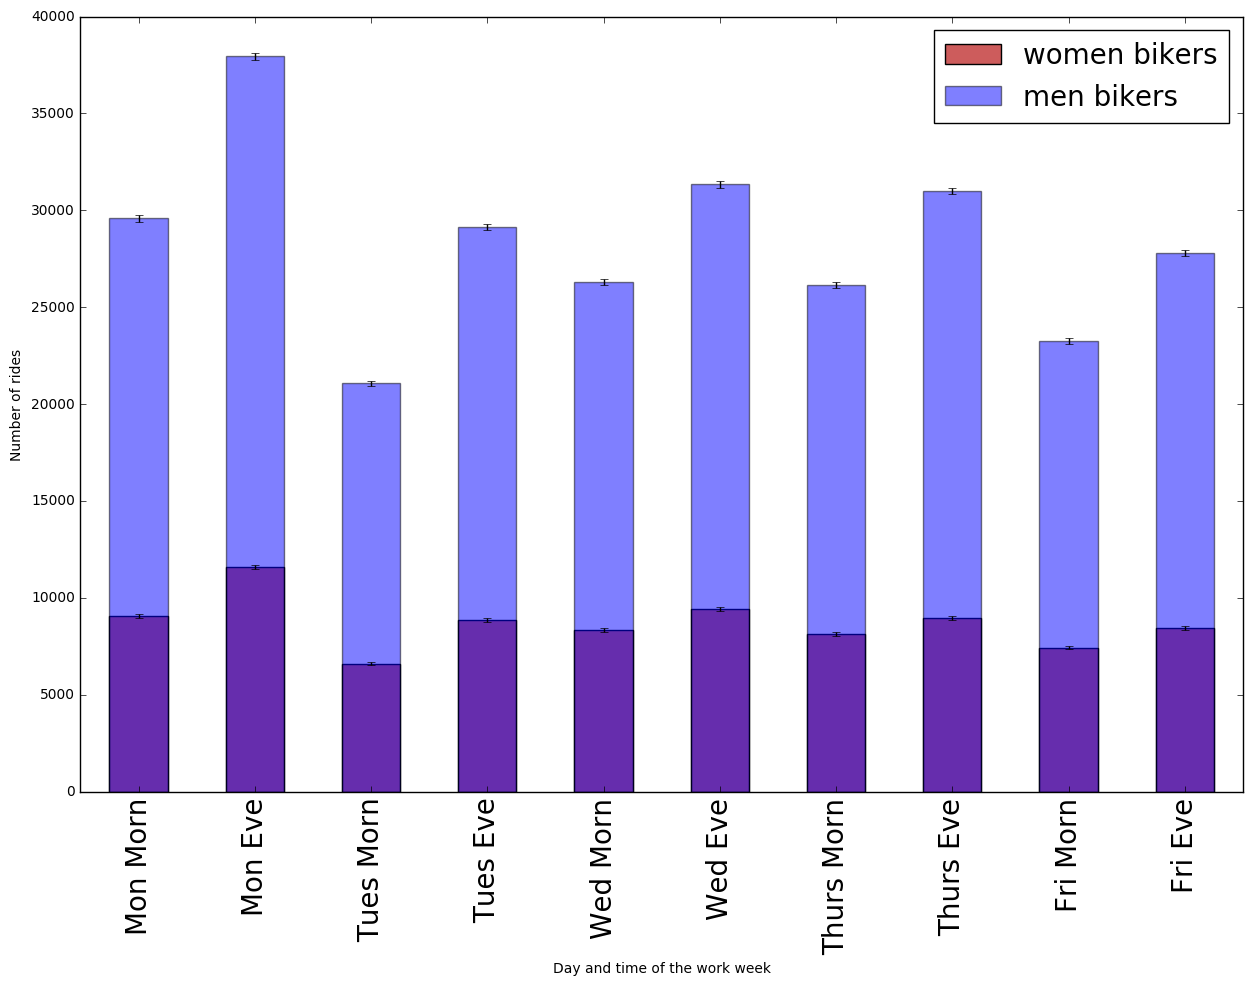

In [39]:
fig=pl.figure(figsize(15,10))

counts_w = df2['date'][df2['gender'] == 2].groupby([df2['date'].dt.weekday, df2['morn_eve']]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df2['date'][df2['gender'] == 1].groupby([df2['date'].dt.weekday, df2['morn_eve']]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(label_names, fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day and time of the work week")
pl.legend(['women bikers','men bikers'],fontsize=20)

In [40]:
### Figure 1:  Distribution of users by gender and commute hours in February 2015

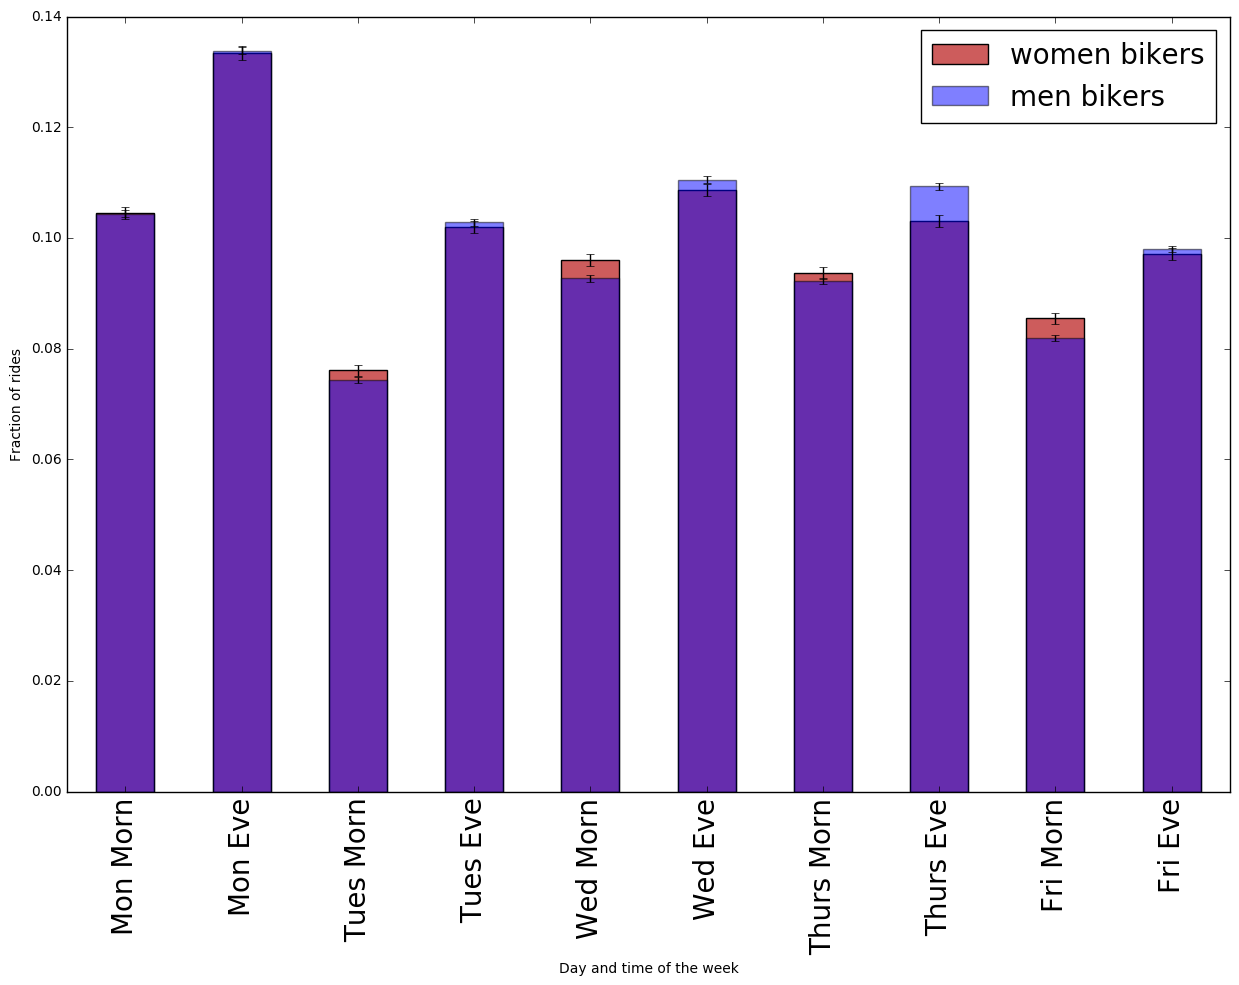

In [41]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m)/norm_m,(error_m)/norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(label_names, fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day and time of the week")

pl.legend(['women bikers','men bikers'],fontsize=20)
pl.show()

In [42]:
### Figure 2: Normalized Distribution of users by gender and commute hours in February 2015

Men: morning:0.820, evening:0.180, morning error:0.001, evening error:0.001
Women: morning:0.456, evening:0.544, morning error:0.002, evening error:0.003


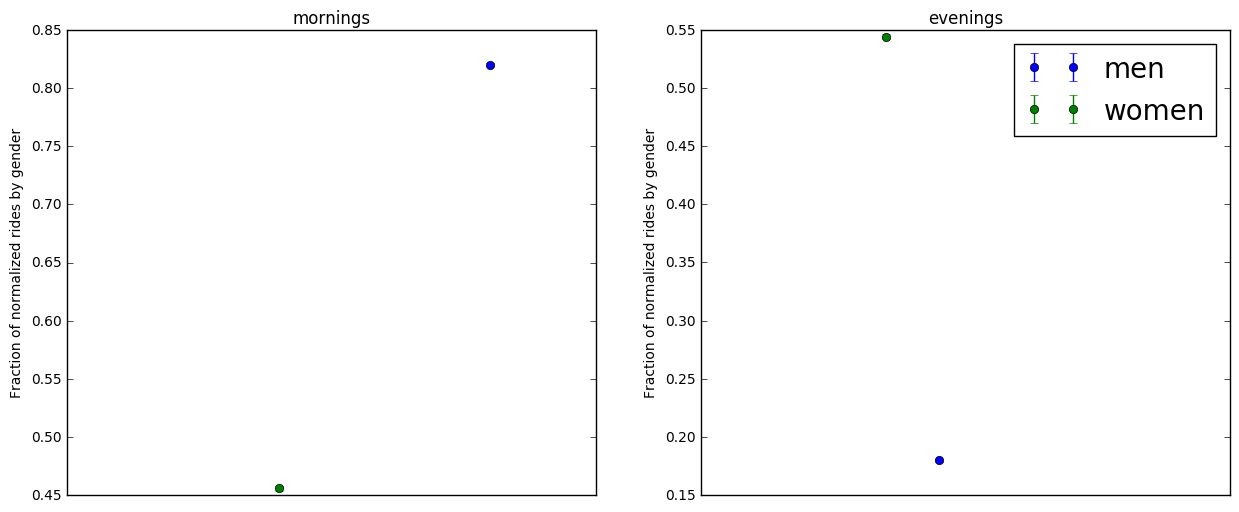

In [43]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
morn_w = sum(counts_w[::2]) * 1.0 / norm_w
eve_w = sum(counts_w[1::2]) * 1.0 / norm_w
emorn_w = np.sqrt(sum(error_w[::2]**2)) / norm_w
eeve_w = np.sqrt(sum(error_w[1::2]**2)) / norm_w

morn_m = sum(counts_m[:-2]) * 1.0 / norm_m
eve_m = sum(counts_m[-2:]) * 1.0 / norm_m
emorn_m = np.sqrt(sum(error_m[::2]**2)) / norm_m
eeve_m = np.sqrt(sum(error_m[1::2]**2)) / norm_m

print("Men: morning:{0:.3f}, evening:{1:.3f}, morning error:{2:.3f}, evening error:{3:.3f}"\
      .format(morn_m, eve_m, emorn_m, eeve_m))
print("Women: morning:{0:.3f}, evening:{1:.3f}, morning error:{2:.3f}, evening error:{3:.3f}"\
      .format(morn_w, eve_w, emorn_w, eeve_w))

ax1.errorbar([0.4], [morn_m], yerr=[emorn_m], fmt='o', label='men')
ax1.errorbar([0.2], [morn_w], yerr=[emorn_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [eve_m], yerr=[eeve_m], fmt='o', label='men')
ax2.errorbar([0.2], [eve_w], yerr=[eeve_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("mornings")
ax2.set_title("evenings")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

In [44]:
### Figure 3: The figure shows the ratio of normalized Citibike bikers by morning / evening rides

### Is the percentage of women that ride on weekends lower or equal to that of man?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{W_{\mathrm{evening}}}{W_{\mathrm{morning}}}$
### and 
# $p_1 = \frac{M_{\mathrm{evening}}}{M_{\mathrm{morming}}}$


In [46]:
p0 = eve_w
p1 = eve_m
print ("difference between man and women on evenings ", p0-p1)
if p0-p1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between man and women on weekend:  0.36438672716
We must check the significance before we reject the Null Hypothesis


In [47]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations
sp_stdev_mw = se(p(eve_w, eve_m, norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)
z = zscore(eve_w, eve_m, sp_stdev_mw)
print ("The z statistics is %.2f"%z) 

The z statistics is 212.76
